In [1]:
import requests
import pandas as pd
from tqdm import tqdm
import numpy as np
from bs4 import BeautifulSoup

In [2]:
title=str(input("enter the title to be searched")).replace(" ","+")
link="https://www.google.com/search?q="+title+'+wikipedia'

enter the title to be searchedmahatma gandhi


In [3]:
link

'https://www.google.com/search?q=mahatma+gandhi+wikipedia'

In [4]:
res=requests.get(link)

In [5]:
soup=BeautifulSoup(res.text,'html.parser')

<!DOCTYPE html>
<html lang="en-IN"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>mahatma gandhi wikipedia - Google Search</title><script nonce="pCvxes6DSj-nqmJbtaWCsQ">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a=c==="1"||c==="q"&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if(a.tagName==="A"){a=a.getAttribute("data-nohref")==="1";break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){window.google=window.google||{};var a=window.performance&&window.performance.timing&&"navigationStart"in window.performance.timing,b=google.stvsc&&google.stvsc.ns,c=a?b||window.performance.timing.navigationStart:void 0,d=google.stvsc&&google.st
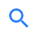

In [6]:
soup

In [7]:
sp=soup.find_all('div')
final_link=""
for i in sp:
    try:
        w=i.find('a').get('href')
        if("en.wikipedia.org" in w):
            final_link=w
            break
    except:
        pass

In [8]:
#### REMEMBER: find_all gives list and get is attribute of individual <a> tag so with find_all you can't use get attribute

In [9]:
final_link1=final_link[7:]

In [10]:
final_link1

'https://en.wikipedia.org/wiki/Mahatma_Gandhi&sa=U&ved=2ahUKEwiB8ubwwuqGAxXERmwGHUrgAnoQFnoECAQQAg&usg=AOvVaw0MHOTsSx0FcboJYp7-eg-X'

In [23]:
final_link2=final_link1.split('&')[0]

In [24]:
final_link2

'https://en.wikipedia.org/wiki/Mahatma_Gandhi'

In [25]:
#Now we have a final_link2 now we scrap this page to get the content

In [26]:
q=requests.get(final_link2)

In [27]:
q

<Response [200]>

In [48]:
c=BeautifulSoup(q.text,'html.parser')

In [61]:
corpus=""
for i in c.find_all('p'):
    corpus+=(i.text)
    corpus+='\n'
print(corpus)    



Mohandas Karamchand Gandhi (ISO: Mōhanadāsa Karamacaṁda Gāṁdhī;[pron 1] 2 October 1869 – 30 January 1948) was an Indian lawyer, anti-colonial nationalist and political ethicist who employed nonviolent resistance to lead the successful campaign for India's independence from British rule. He inspired movements for civil rights and freedom across the world. The honorific Mahātmā (from Sanskrit 'great-souled, venerable'), first applied to him in South Africa in 1914, is now used throughout the world.[2]

Born and raised in a Hindu family in coastal Gujarat, Gandhi trained in the law at the Inner Temple in London and was called to the bar in June 1891, at the age of 22. After two uncertain years in India, where he was unable to start a successful law practice, Gandhi moved to South Africa in 1893 to represent an Indian merchant in a lawsuit. He went on to live in South Africa for 21 years. There, Gandhi raised a family and first employed nonviolent resistance in a campaign for civil right

In [67]:
corpus.replace('\n','')
corpus.strip()
for i in range(363):
    corpus=corpus.replace('['+str(i)+']','')    #Remember strings in python is immutable so after changes u have to reassign it

In [68]:
corpus    #this is the raw format ...u ca't change this as it always contains \n 

'\n\nMohandas Karamchand Gandhi (ISO: Mōhanadāsa Karamacaṁda Gāṁdhī;[pron 1] 2 October 1869\xa0– 30 January 1948) was an Indian lawyer, anti-colonial nationalist and political ethicist who employed nonviolent resistance to lead the successful campaign for India\'s independence from British rule. He inspired movements for civil rights and freedom across the world. The honorific Mahātmā (from Sanskrit\xa0\'great-souled, venerable\'), first applied to him in South Africa in 1914, is now used throughout the world.\n\nBorn and raised in a Hindu family in coastal Gujarat, Gandhi trained in the law at the Inner Temple in London and was called to the bar in June 1891, at the age of 22. After two uncertain years in India, where he was unable to start a successful law practice, Gandhi moved to South Africa in 1893 to represent an Indian merchant in a lawsuit. He went on to live in South Africa for 21 years. There, Gandhi raised a family and first employed nonviolent resistance in a campaign for 

# Content is scrapped

In [69]:
print(corpus)



Mohandas Karamchand Gandhi (ISO: Mōhanadāsa Karamacaṁda Gāṁdhī;[pron 1] 2 October 1869 – 30 January 1948) was an Indian lawyer, anti-colonial nationalist and political ethicist who employed nonviolent resistance to lead the successful campaign for India's independence from British rule. He inspired movements for civil rights and freedom across the world. The honorific Mahātmā (from Sanskrit 'great-souled, venerable'), first applied to him in South Africa in 1914, is now used throughout the world.

Born and raised in a Hindu family in coastal Gujarat, Gandhi trained in the law at the Inner Temple in London and was called to the bar in June 1891, at the age of 22. After two uncertain years in India, where he was unable to start a successful law practice, Gandhi moved to South Africa in 1893 to represent an Indian merchant in a lawsuit. He went on to live in South Africa for 21 years. There, Gandhi raised a family and first employed nonviolent resistance in a campaign for civil rights. 